In [1]:
!pip install numpy pandas scikit-learn seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 657.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 853.3 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 908.0 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Task 1: Introduction to Machine Learning with Scikit-learn

This notebook demonstrates core ML concepts using the Titanic dataset and includes classification using Logistic Regression and K-Nearest Neighbors (KNN). It addresses all four subtasks of the internship task.


In [8]:
# [Subtask 1] Study types of ML: Supervised vs Unsupervised
# In this task, we focus on supervised learning, where the model learns from labeled data.
# We use two supervised classification algorithms: Logistic Regression and K-Nearest Neighbors (KNN).
# Unsupervised learning (e.g., clustering) will be covered in Task 3.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [10]:
# [Subtask 2] Clean and preprocess the dataset

# Drop irrelevant columns
data = data.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

# Handle missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data.dropna(inplace=True)

# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'embarked'], drop_first=True)

data.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,False,True


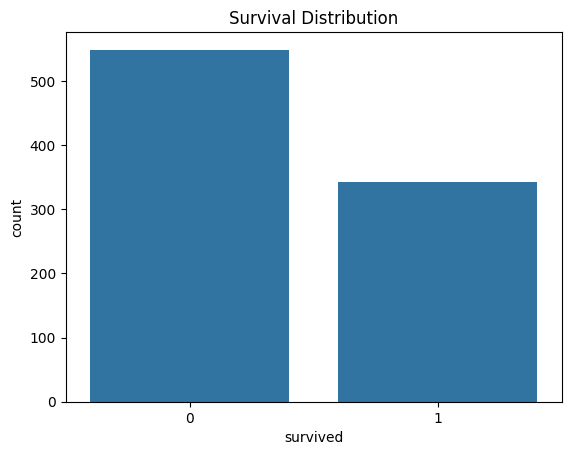

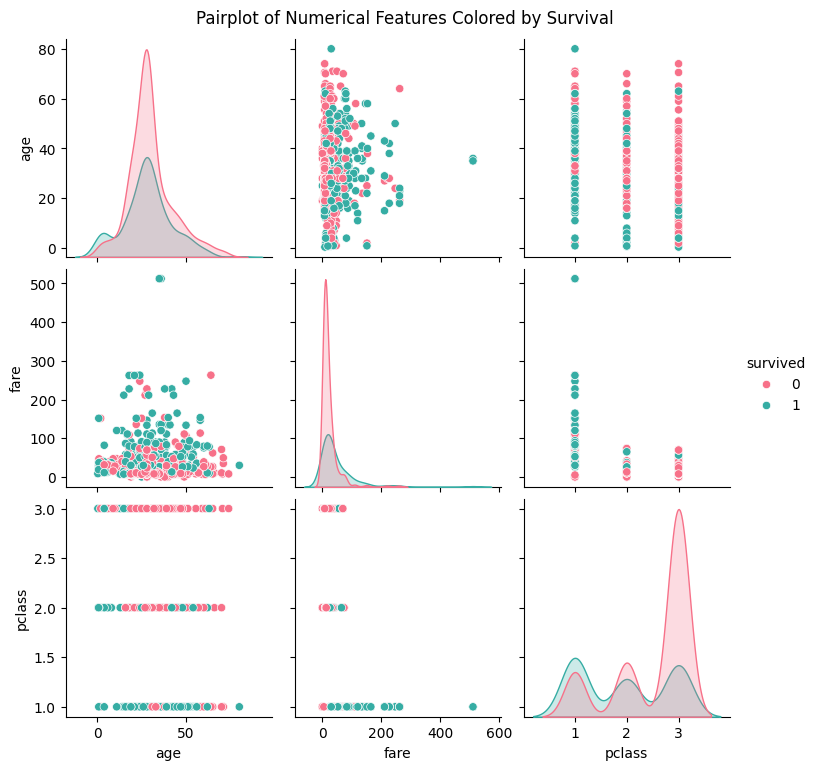

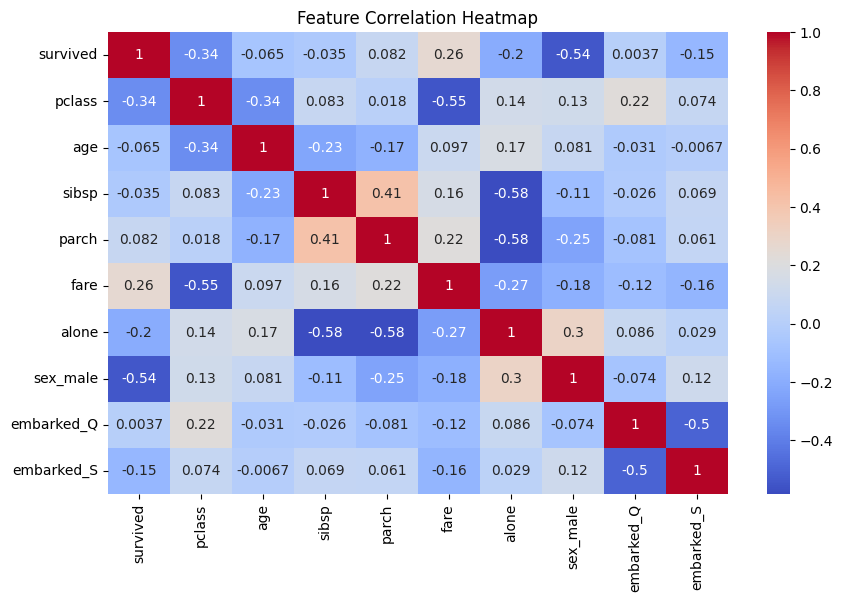

In [18]:
# [Subtask 2] Visualize class distribution before modeling

sns.countplot(x='survived', data=data)
plt.title("Survival Distribution")
plt.show()
print("\n")

# Pairplot for numerical features vs survival
sns.pairplot(data[['age', 'fare', 'pclass', 'survived']], hue='survived', palette='husl')
plt.suptitle('Pairplot of Numerical Features Colored by Survival', y=1.02)
plt.show()
print("\n")

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

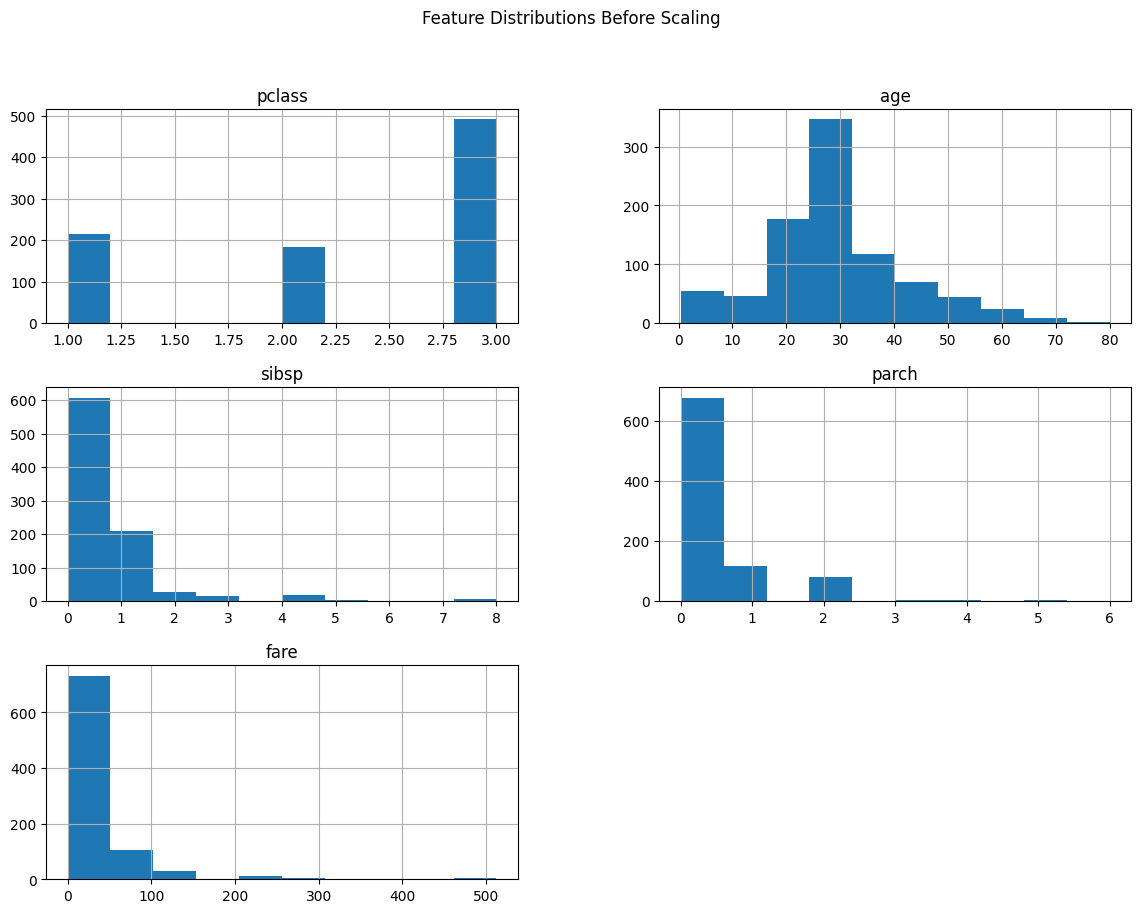

In [12]:
# [Subtask 2] Set up features and scale them

X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize feature distribution (before scaling)
X_df = pd.DataFrame(X, columns=X.columns)
X_df.hist(figsize=(14,10))
plt.suptitle("Feature Distributions Before Scaling")
plt.show()

In [13]:
# [Subtask 3] Classification using Logistic Regression (a supervised algorithm)
# Logistic Regression is a linear classification algorithm used for binary outcomes like "survived" or "not survived".
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# [Subtask 3] Classification using KNN (a supervised algorithm)
# KNN predicts a class based on the majority class among its k nearest neighbors.
# It is non-parametric and works well for small to medium-sized datasets.
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

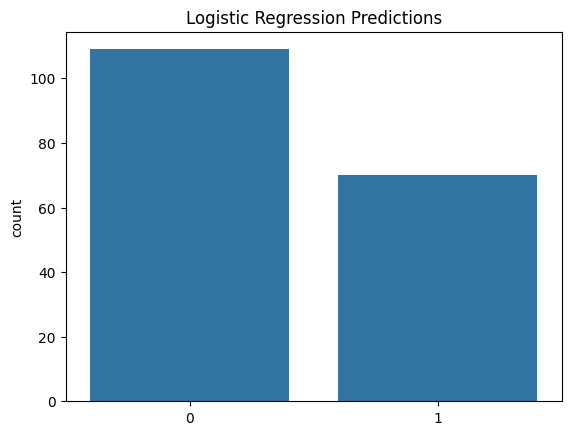

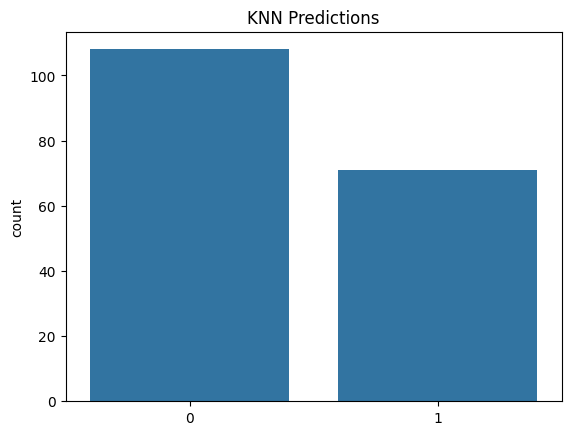

In [14]:
# Visualize prediction distributions
sns.countplot(x=y_pred_log)
plt.title("Logistic Regression Predictions")
plt.show()

sns.countplot(x=y_pred_knn)
plt.title("KNN Predictions")
plt.show()

In [15]:
# [Subtask 4] Define a reusable function to evaluate classification models
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate Logistic Regression and KNN models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("KNN Classifier", y_test, y_pred_knn)


Logistic Regression Evaluation
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


KNN Classifier Evaluation
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[89 16]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



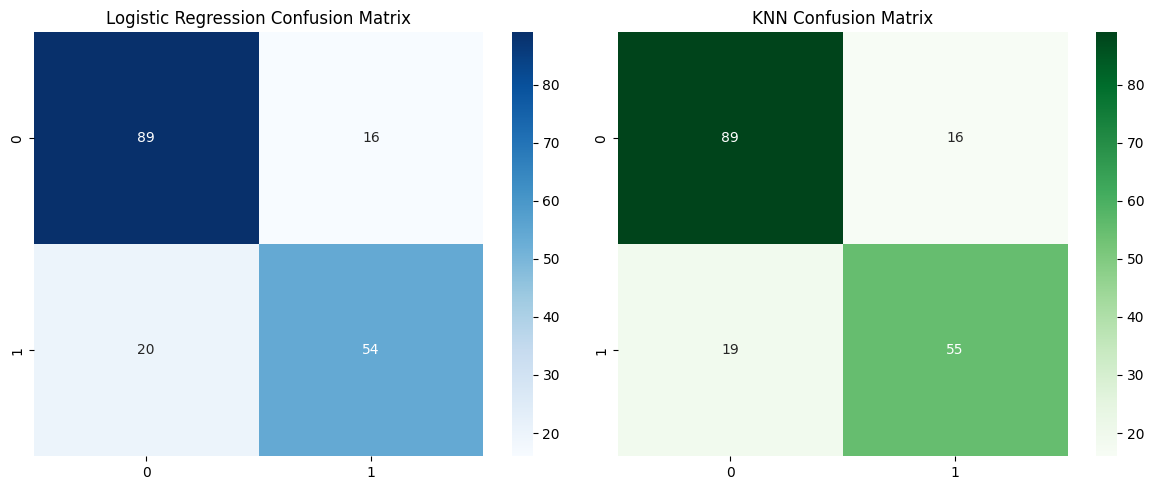

In [16]:
# [Subtask 4] Visualize confusion matrices for both models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")

plt.tight_layout()
plt.show()